In [29]:
#Import all the tools that will be needed
#Regular EDA and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#models from the Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder

In [56]:
df = pd.read_csv("Fraud.csv")
df.shape #(rows, column)

(6362620, 11)

In [57]:
#Data Exploration (exploratory data analysis or EDA)
# Data Exploration (exploratory data analysis or EDA)
# The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

# What question(s) are you trying to solve?
# What kind of data do we have and how do we treat different types?
# What's missing from the data and how do you deal with it?
# Where are the outliers and why should you care about them?
# How can you add, change or remove features to get more out of your data?

df.head().T #tranform so we can visualise it in a better way 

,0,1,2,3,4
step,1,1,1,1,1
type,PAYMENT,PAYMENT,TRANSFER,CASH_OUT,PAYMENT
amount,9839.64,1864.28,181.0,181.0,11668.14
nameOrig,C1231006815,C1666544295,C1305486145,C840083671,C2048537720
oldbalanceOrg,170136.0,21249.0,181.0,181.0,41554.0
newbalanceOrig,160296.36,19384.72,0.0,0.0,29885.86
nameDest,M1979787155,M2044282225,C553264065,C38997010,M1230701703
oldbalanceDest,0.0,0.0,0.0,21182.0,0.0
newbalanceDest,0.0,0.0,0.0,0.0,0.0
isFraud,0,0,1,1,0


In [58]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [61]:
#Lets find out how many class we got
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [62]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

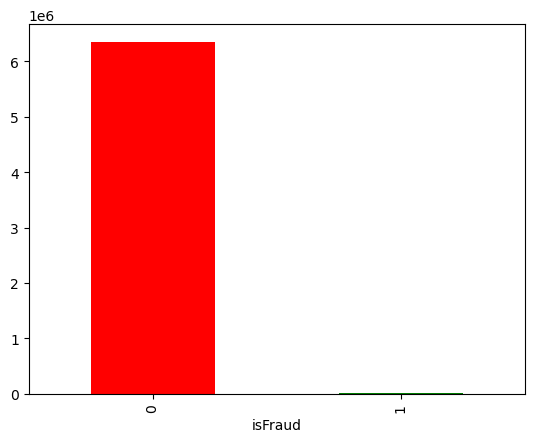

In [63]:
#Draw a bar chart so we can have better visualisation
df["isFraud"].value_counts().plot(kind ="bar", color=["red", "green"]);

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [65]:
#to check whether we have any missing value
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [66]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [67]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


step


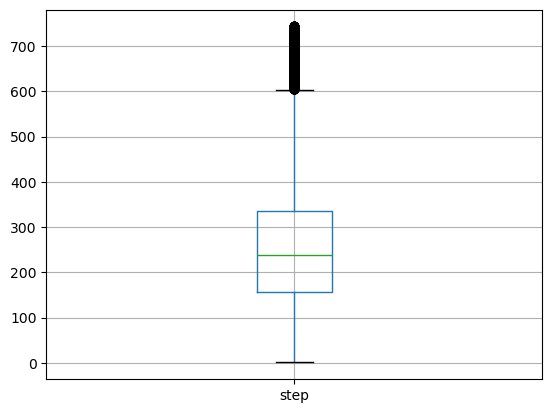

amount


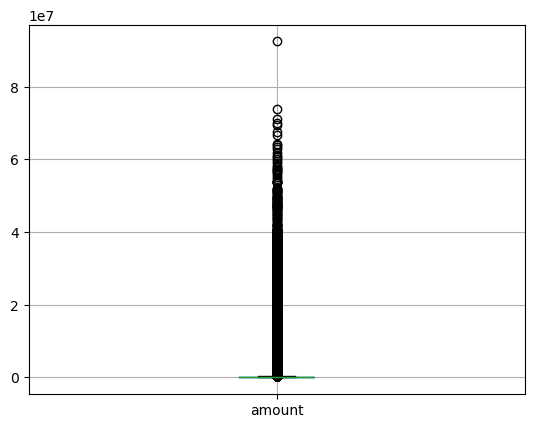

oldbalanceOrg


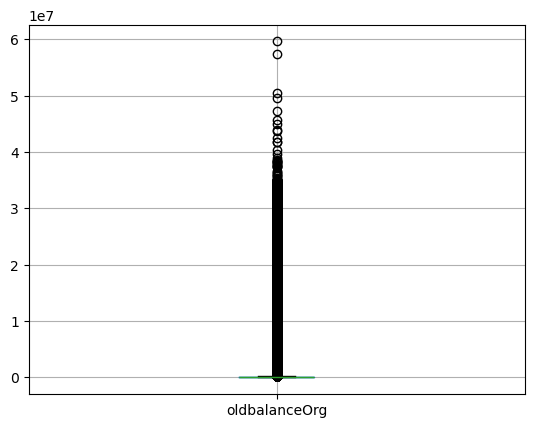

newbalanceOrig


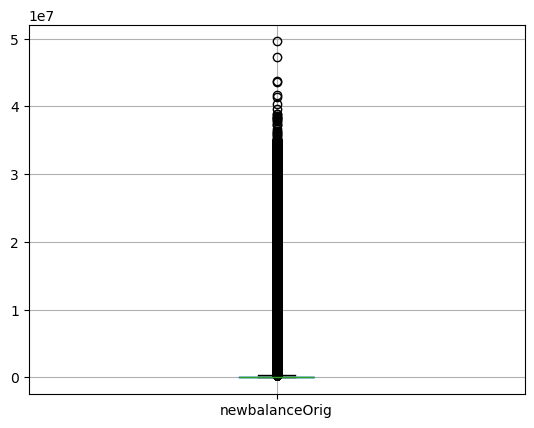

oldbalanceDest


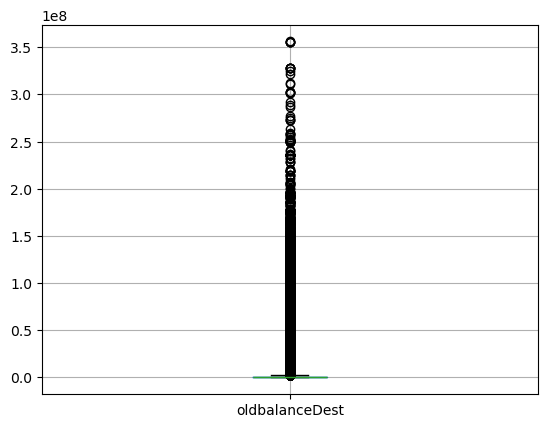

newbalanceDest


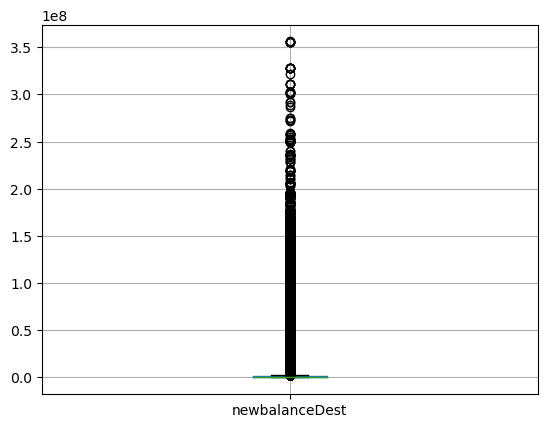

isFraud


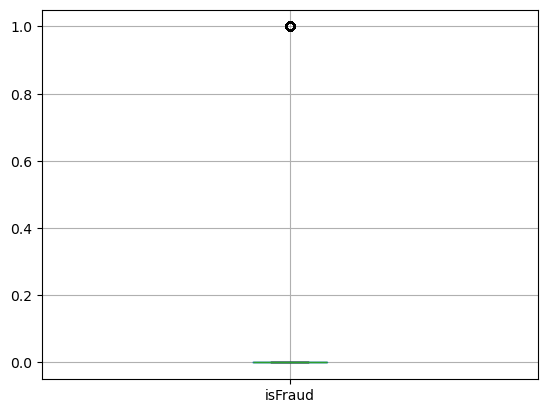

isFlaggedFraud


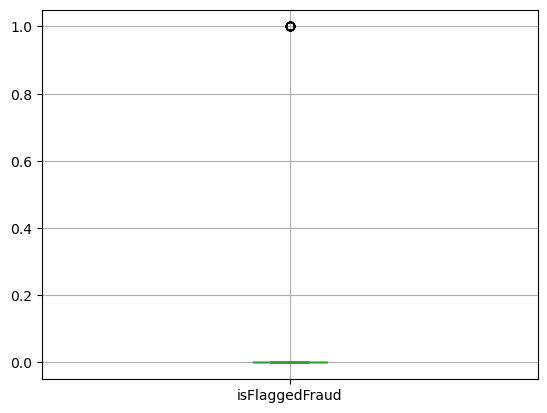

In [69]:
# Outliers are important in data analysis and machine learning because they provide critical insights and can significantly impact the results of models. Here are a few key reasons why outliers matter:
# Fraud Detection: Outliers often represent fraudulent transactions, like unusual purchase amounts or unexpected money transfers in financial data.
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        print(col)
        df.boxplot(column = col)
        plt.show()
    else:
        pass

In [72]:
#checking for outliers
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Initialize a dictionary to store the number of outliers for each column
outliers_count = {}

for col in numerical_columns:
    # Calculate the IQR for each numerical column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify potential outliers using the IQR method
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) |
                (df[col] > (Q3 + 1.5 * IQR)))
    
    # Count the number of outliers for the current column
    num_outliers = outliers.sum()
    
    # Store the count in the dictionary
    outliers_count[col] = num_outliers

# Display the number of outliers for each column
for col, count in outliers_count.items():
    print(f"Number of outliers in column '{col}': {count}")

Number of outliers in column 'step': 102688
Number of outliers in column 'amount': 338078
Number of outliers in column 'oldbalanceOrg': 1112507
Number of outliers in column 'newbalanceOrig': 1053391
Number of outliers in column 'oldbalanceDest': 786135
Number of outliers in column 'newbalanceDest': 738527


In [74]:
print(df['nameOrig'].unique())

['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


In [77]:
print(df['nameDest'].unique())

['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [86]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [87]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [89]:
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type'], dtype='object')


In [90]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB
None


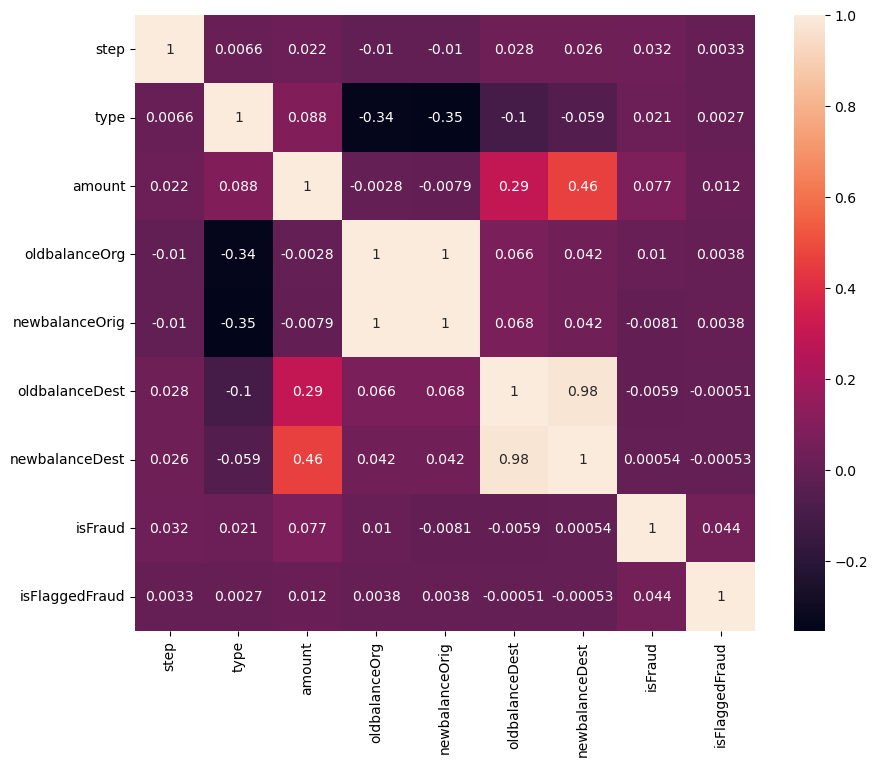

In [91]:
correlation_matrix = new_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [93]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = new_df.drop(['isFraud'], axis=1)  # Features
y = new_df['isFraud']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [94]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [95]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
clf.score(X_train, y_train )

1.0

In [107]:
clf.score(X_test, y_test )

0.9997013808776888

In [124]:
y_pred = clf.predict(X_test)

In [127]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are your test and predicted labels
classification_report_rf = classification_report(y_test, y_pred)  # Call the classification_report function
print("Classification Report")
print(classification_report_rf)  # Print the report

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270925
           1       0.99      0.77      0.87      1599

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [106]:
feature_importances = clf.feature_importances_
feature_importances
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)

          Feature  Importance
6  newbalanceDest    0.324205
3   oldbalanceOrg    0.268431
2          amount    0.166021
0            step    0.099228
5  oldbalanceDest    0.069932
1            type    0.049807
4  newbalanceOrig    0.021602
7  isFlaggedFraud    0.000774


In [ ]:
# Data Cleaning: Handle missing values, address outliers, and check for multicollinearity (e.g., using VIF). Remove or adjust problematic data as needed.

# Fraud Detection Model: Use classification models like Logistic Regression or Random Forest. Handle class imbalance (e.g., with SMOTE), and fine-tune the model for best performance.

# Variable Selection: Select features based on importance (e.g., Random Forest feature importance or RFE). From your analysis, key features are newbalanceDest, oldbalanceOrg, and amount.

# Model Performance: Evaluate using metrics like precision, recall, F1 score, and ROC-AUC, especially considering class imbalance.

# Key Predictors of Fraud: Important predictors are:

# newbalanceDest, oldbalanceOrg, and amount, which align with common fraud indicators like unusual balances and large transactions.
# Does It Make Sense?: Yes, these features logically predict fraud due to abnormal account balances and large transfers typically associated with fraud.

# Prevention Suggestions: Implement real-time monitoring, improve authentication, and deploy machine learning models in production to catch suspicious behavior early.

# Assessing Action Effectiveness: Monitor fraud trends post-implementation, run A/B tests, and audit systems to measure impact on fraud detection accuracy.